In [1]:
!pip install factor_analyzer

In [2]:
from factor_analyzer import FactorAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"F:\Documents\Downloads\train.csv")

In [4]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
df.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

<AxesSubplot:>

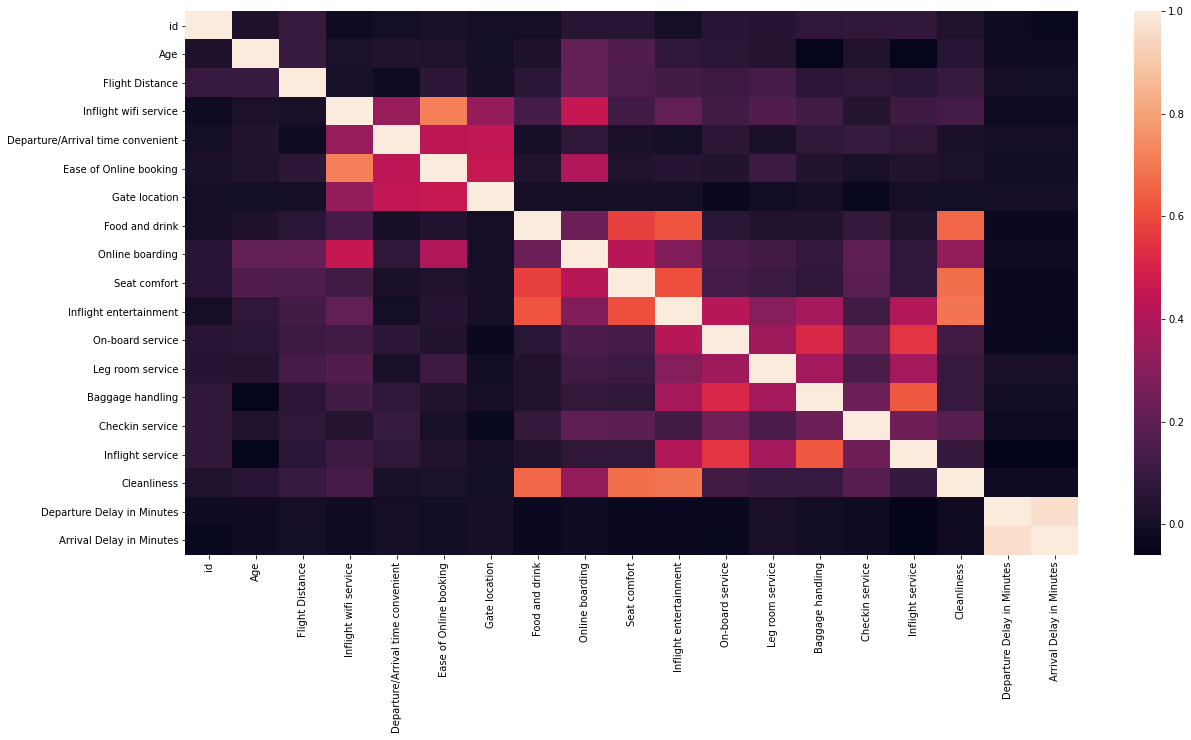

In [6]:
plt.figure(figsize=(20,10))
c = df.corr()
sns.heatmap(c)

In [7]:
df.drop(['Arrival Delay in Minutes'], axis = 1, inplace = True)

In [8]:
#Dropping all columns which are not ordinal
x = df[df.columns[7:21]]
x.columns

Index(['Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness'],
      dtype='object')

In [9]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(x)

In [10]:
chi_square_value, p_value

(601690.8930479772, 0.0)

In [11]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(x)
kmo_model

0.781229425716445

In [12]:
#Create factor analysis
fa = FactorAnalyzer()
fa.fit(x, 14) #Checking Eigen Values
ev, v = fa.get_eigenvalues()
ev

array([3.80011677, 2.36198598, 2.16589224, 1.06327401, 0.95093123,
       0.7003355 , 0.53995637, 0.51465504, 0.46947475, 0.36866001,
       0.32840792, 0.29509562, 0.25317089, 0.18804368])

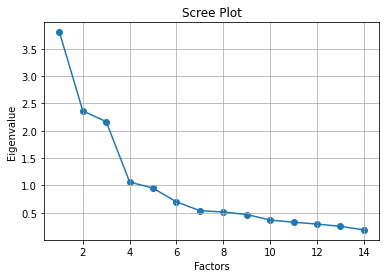

In [13]:
#Creates Scree Plot using Matplotlib
plt.scatter(range(1, x.shape[1]+1),ev)
plt.plot(range(1, x.shape[1]+1), ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [14]:
fa = FactorAnalyzer(4, rotation = 'promax')
fa.fit(x)
loads = fa.loadings_

In [15]:
?FactorAnalyzer

In [16]:
loadings = pd.DataFrame(loads)
loadings

,0,1,2,3
0,-0.017943,0.041272,0.499750,0.464001
1,0.016234,0.054087,0.606817,-0.068733
2,-0.128669,-0.049021,0.665939,0.450739
3,0.082610,-0.041434,0.730367,-0.187674
4,0.810338,-0.120425,0.057920,-0.032733
5,0.088286,-0.041303,-0.092479,0.823187
6,0.732636,-0.065415,-0.053318,0.169248
7,0.747024,0.367021,0.058879,-0.080358
8,-0.013403,0.715014,-0.013177,-0.008602
9,-0.027662,0.483435,0.008883,0.061796


In [17]:
loadings.index = x.columns
loadings.columns = ['Factor 1', 'Factor 2', 'Factor 3', 'Factor 4']

In [18]:
loadings.to_csv('factor_loadings2.csv')

In [19]:
loadings.columns = ['Comfort', 'Service', 'Convenience', 'f4']

In [20]:
loadings

,Comfort,Service,Convenience,f4
Inflight wifi service,-0.017943,0.041272,0.499750,0.464001
Departure/Arrival time convenient,0.016234,0.054087,0.606817,-0.068733
Ease of Online booking,-0.128669,-0.049021,0.665939,0.450739
Gate location,0.082610,-0.041434,0.730367,-0.187674
Food and drink,0.810338,-0.120425,0.057920,-0.032733
Online boarding,0.088286,-0.041303,-0.092479,0.823187
Seat comfort,0.732636,-0.065415,-0.053318,0.169248
Inflight entertainment,0.747024,0.367021,0.058879,-0.080358
On-board service,-0.013403,0.715014,-0.013177,-0.008602
Leg room service,-0.027662,0.483435,0.008883,0.061796


In [21]:
#Common variance of each variable wrt to other variables
fa.get_communalities()

array([0.46707234, 0.37614035, 0.6655997 , 0.57719838, 0.67557595,
       0.69568924, 0.57252234, 0.70267237, 0.51167184, 0.23837239,
       0.65907191, 0.08915608, 0.73457752, 0.76207342])

In [22]:
#1 - communality
fa.get_uniquenesses()

array([0.53292766, 0.62385965, 0.3344003 , 0.42280162, 0.32442405,
       0.30431076, 0.42747766, 0.29732763, 0.48832816, 0.76162761,
       0.34092809, 0.91084392, 0.26542248, 0.23792658])